In [2]:
%matplotlib inline

In [3]:
from data_dashboard import Dashboard
from data_dashboard.examples import iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import time

## Data Load

In [37]:
#pip install openpyxl
df = pd.read_excel('tous_exemplaires_2015-2021.xlsx').convert_dtypes()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55007 entries, 0 to 55006
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   No Doc                     55007 non-null  Int64 
 1   Titre                      55007 non-null  string
 2   Date Publication           55007 non-null  Int64 
 3   ID Statut Exemplaire       55007 non-null  Int64 
 4   Desc Cote Principale       54977 non-null  string
 5   Desc Type Matériel         55007 non-null  string
 6   Bibliothèque Exemplaire    55007 non-null  string
 7   Desc Localisation          55007 non-null  string
 8   PPN                        54945 non-null  string
 9   Desc Type Cote Principale  55007 non-null  string
 10  Desc Cote Début            22943 non-null  Int64 
 11  Numéro Inventaire          54598 non-null  string
 12  Année Premier Prêt         26324 non-null  Int64 
 13  Année Création Exemplaire  55007 non-null  Int64 
dtypes: Int

In [10]:
df.describe(include="all")

,No Doc,Titre,Date Publication,ID Statut Exemplaire,Desc Cote Principale,Desc Type Matériel,Bibliothèque Exemplaire,Desc Localisation,PPN,Desc Type Cote Principale,Desc Cote Début,Numéro Inventaire,Année Premier Prêt,Année Création Exemplaire
count,55007.000000,55007,55007.000000,55007.000000,54977,55007,55007,55007,54945,55007,22943.000000,54598,26324.000000,55007.000000
unique,NaN,36915,NaN,NaN,38572,1,8,46,43986,4,NaN,54191,NaN,NaN
top,NaN,Droit des obligations,NaN,NaN,616 ECN,Livre,LASH,RDC,000361077,Dewey,NaN,2013-DROIT-833,NaN,NaN
freq,NaN,114,NaN,NaN,164,55007,20686,13848,95,38858,NaN,19,NaN,NaN
mean,399203.626084,NaN,2002.074772,18.938172,NaN,NaN,NaN,NaN,NaN,NaN,576.659025,NaN,2018.509307,2018.171524
std,103586.003959,NaN,71.073621,0.240846,NaN,NaN,NaN,NaN,NaN,NaN,283.002915,NaN,2.027437,2.023589
min,216.000000,NaN,0.000000,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,2015.000000,2015.000000
25%,395924.000000,NaN,1997.000000,19.000000,NaN,NaN,NaN,NaN,NaN,NaN,401.000000,NaN,2017.000000,2016.000000
50%,416049.000000,NaN,2015.000000,19.000000,NaN,NaN,NaN,NaN,NaN,NaN,621.000000,NaN,2018.000000,2018.000000
75%,476969.500000,NaN,2018.000000,19.000000,NaN,NaN,NaN,NaN,NaN,NaN,810.000000,NaN,2020.000000,2020.000000


### Premiers filtres sur le dataset

In [38]:
df = df[(df['Date Publication'] != 0) & (df['Date Publication'] != 2022)]

In [39]:
df = df.dropna(subset = ['Desc Cote Principale', 'PPN', 'Numéro Inventaire'])

In [40]:
df.drop(['No Doc','Titre','Desc Type Matériel'], axis = 1, inplace = True)

### Homogénéisation cols type

In [41]:
# Typage des colonnes en variables qualitatives
for col in df.columns:
    df[col] = df[col].astype('category')

In [15]:
df.describe(include="all")

,Date Publication,ID Statut Exemplaire,Desc Cote Principale,Bibliothèque Exemplaire,Desc Localisation,PPN,Desc Type Cote Principale,Desc Cote Début,Numéro Inventaire,Année Premier Prêt,Année Création Exemplaire
count,54537,54537,54537,54537,54537,54537,54537,22723,54537,26211,54537
unique,174,2,38299,8,45,43718,4,448,54133,8,7
top,2016,19,616 ECN,LASH,RDC,000361077,Dewey,658,2013-DROIT-833,2019,2020
freq,4918,51146,163,20495,13783,95,38482,2437,19,4264,9184


In [16]:
df.head(10)

,Date Publication,ID Statut Exemplaire,Desc Cote Principale,Bibliothèque Exemplaire,Desc Localisation,PPN,Desc Type Cote Principale,Desc Cote Début,Numéro Inventaire,Année Premier Prêt,Année Création Exemplaire
0,2001,19,331.1 CAR,SJA,1er étage,PPN055356028,Dewey,NaN,2017-SJA-131,2018,2017
1,2005,19,868.993 5 VARG,LASH,1er étage,PPN092206719,Dewey,868,2018-DONS-LASH-339,2022,2018
2,2007,19,194.409 FOUC 5 ARO,LASH,RDC,PPN120256800,Dewey,194,29293-59-A,NaN,2017
3,2007,19,658.848 HAT,SJA,1er étage,PPN119903601,Dewey,658,2020-SJA-650,NaN,2020
4,1942,19,ML 24179,LASH,Magasins (sous-sol),PPN010608958,Magasin simple (Num d'inv),NaN,2016-DONS-LASH-137,2020,2016
5,2005,19,362.8 JAS,SJA,RDC,PPN088653900,Dewey,362,2016-DONS-SJA-517,2016,2016
6,1954,19,198 SPIN 5 VER,LASH,RDC,PPN005004489,Dewey,198,2016-BS-LASH-111,NaN,2016
7,2004,19,341.482 BER,DROIT,RDC (SA1),PPN079275540,Dewey,NaN,2015-DONS-CEJM-112,2015,2015
8,2013,19,346 BUF,DROIT,Etage (SA2),PPN172643821,Dewey,NaN,2015-DONS-DROIT-133,2021,2015
9,1980,19,154.24 ORT,SJA,2e étage - bibliothèque de recherche,PPN000508152,Dewey,154,2017-DONS-SJA-32,NaN,2017


## Création variable cible binaire (0/1) selon la variable Année Premier Prêt

In [42]:
def create_variable_cible(row):
    if pd.isna(row['Année Premier Prêt']):
        return "0"
    else:
        return "1"

In [43]:
df["pret"] = df.apply (lambda row:create_variable_cible(row), axis=1)

<AxesSubplot:>

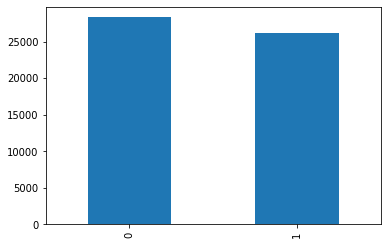

In [19]:
df["pret"].value_counts().plot(kind="bar")

In [44]:
df.drop(['Année Premier Prêt'], axis = 1, inplace = True)

# Data Visus simples

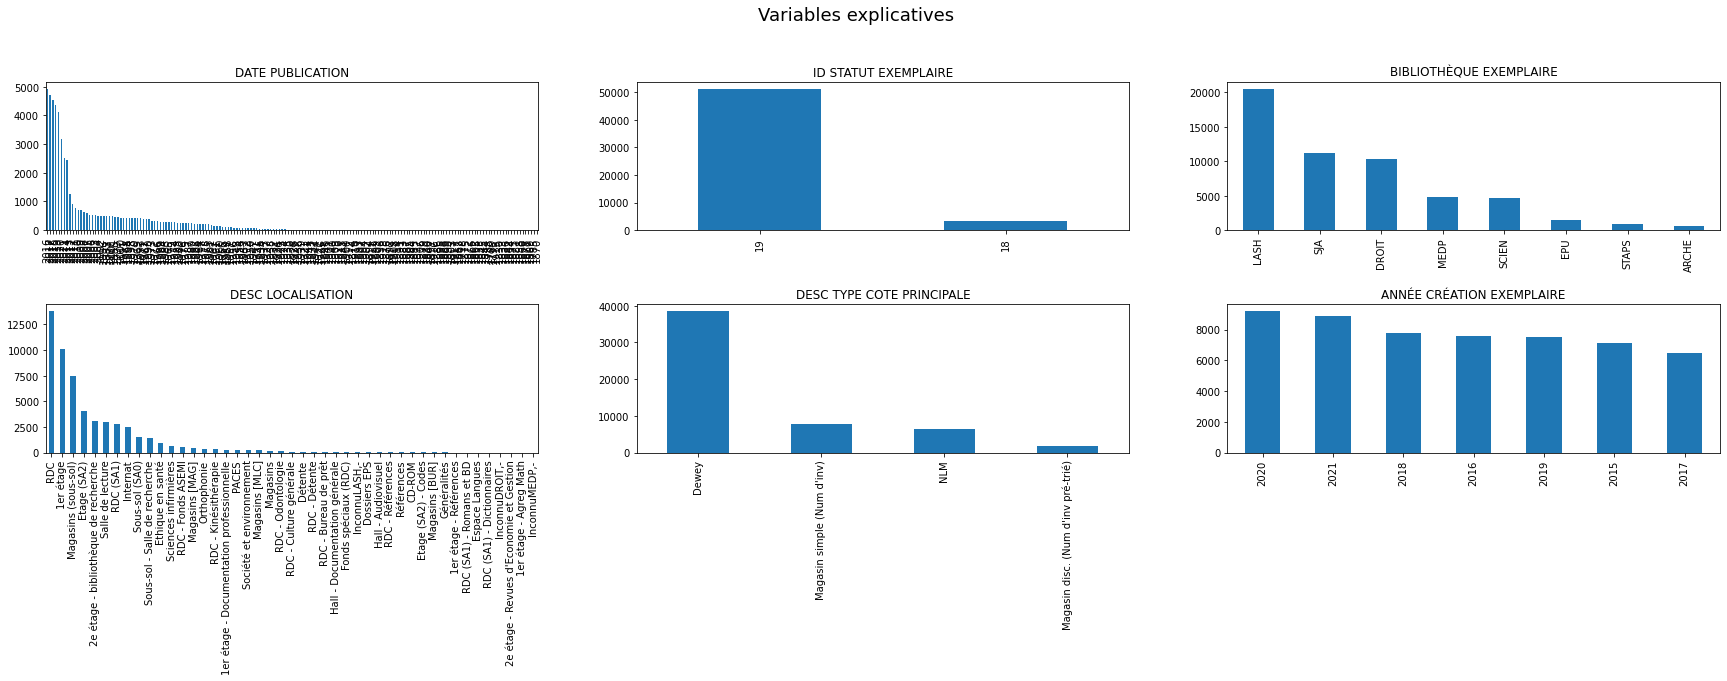

In [22]:
# Visu simple de répartition des modalités par variable
cols_to_vizualise = ['Date Publication','ID Statut Exemplaire','Bibliothèque Exemplaire','Desc Localisation','Desc Type Cote Principale','Année Création Exemplaire']
plt.figure(figsize=(30, 15))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Variables explicatives", fontsize=18, y=0.95)
for i, col in enumerate(cols_to_vizualise):
    ax = plt.subplot(4, 3, i + 1)
    df[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(col.upper())
    ax.set_xlabel("")

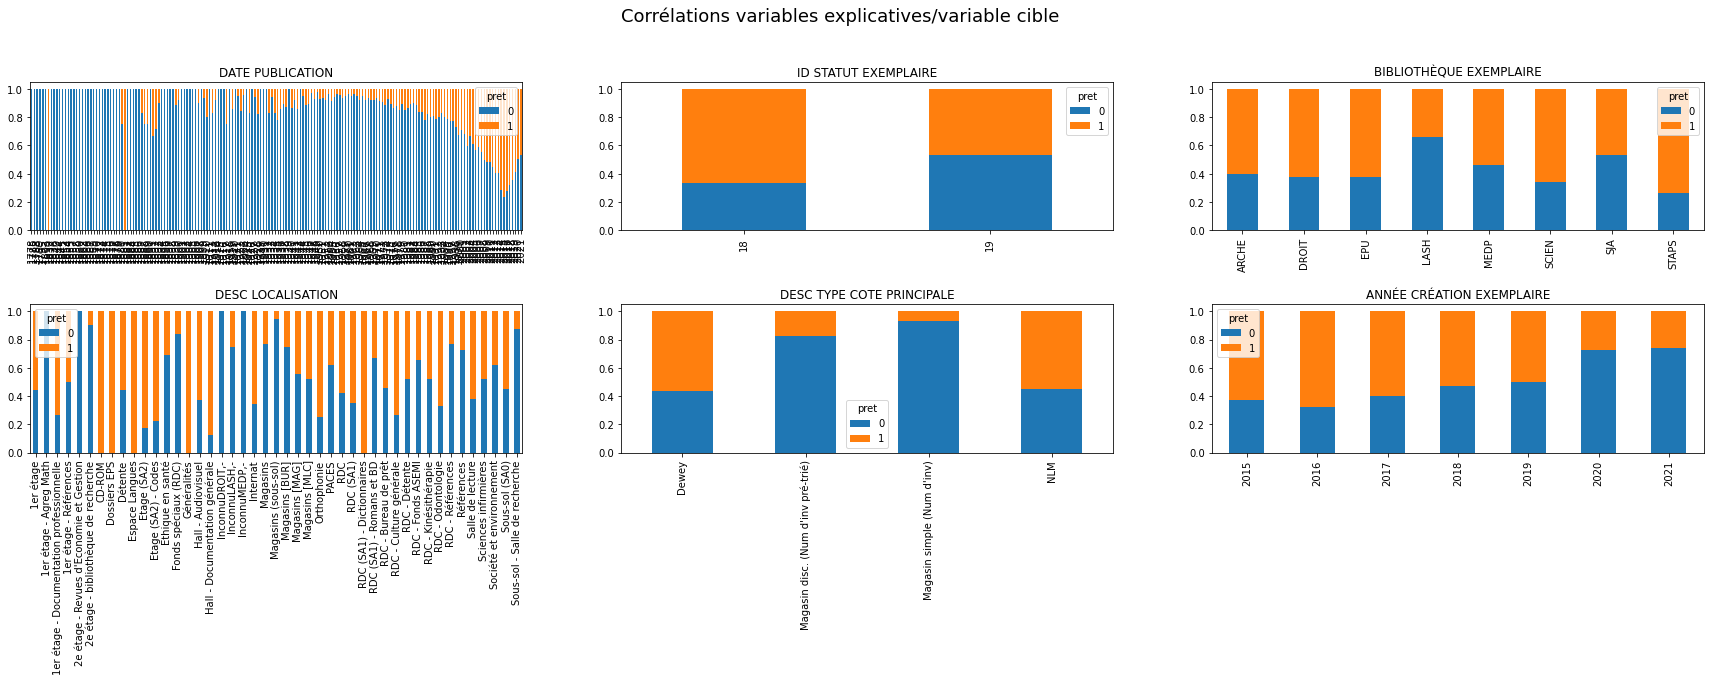

In [23]:
plt.figure(figsize=(30, 15))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Corrélations variables explicatives/variable cible", fontsize=18, y=0.95)
for i, col in enumerate(cols_to_vizualise):
    ax = plt.subplot(4, 3, i + 1)
    table=pd.crosstab(df[col],df['pret'])
    table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(col.upper())
    ax.set_xlabel("")

# Data Processing

## Date de création des exemplaires

On créé une nouvelle variable quantitative qui mesure l'écart (en nombre d'année) entre la date de création de l'exemplaire, donc sa date d'entrée dans les collections, et la date de publication du document

In [45]:
df['diff_datecreation_datepub'] = df['Année Création Exemplaire'].astype(int) - df['Date Publication'].astype(int)

In [13]:
df['diff_datecreation_datepub'].describe()

count    54537.000000
mean        13.799879
std         21.599796
min         -3.000000
25%          0.000000
50%          2.000000
75%         21.000000
max        242.000000
Name: diff_datecreation_datepub, dtype: float64

In [46]:
# Filtre : on ne garde que les lignes ayant une diff supérieure ou égale à 0
df = df[df.diff_datecreation_datepub >= 0]

<AxesSubplot:ylabel='Frequency'>

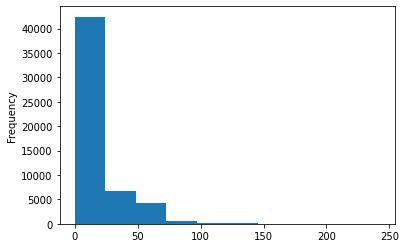

In [15]:
df.diff_datecreation_datepub.plot(kind="hist")

In [ ]:
#df.drop(['Année Création Exemplaire'], axis = 1, inplace = True)

## Localisations

In [16]:

#pd.set_option("display.max_rows", None)
df['Desc Localisation'].value_counts()

RDC                                          13770
1er étage                                    10093
Magasins (sous-sol)                           7452
Etage (SA2)                                   4070
2e étage - bibliothèque de recherche          3112
Salle de lecture                              3012
RDC (SA1)                                     2745
Internat                                      2462
Sous-sol (SA0)                                1471
Sous-sol - Salle de recherche                 1416
Ethique en santé                               949
Sciences infirmières                           599
RDC - Fonds ASEMI                              531
Magasins [MAG]                                 404
Orthophonie                                    394
RDC - Kinésithérapie                           303
1er étage - Documentation professionnelle      254
PACES                                          250
Société et environnement                       248
Magasins [MLC]                 

Cette donnée représente une information dont on suppose qu'elle peut constituer une bonne variable explicative : le type d'accès direct ou indirect -> création d'une nouvelle variable (pour représenter de manière homogène ces 2 niveaux d'information) à 2 modalités (direct, indirect)

In [47]:
# Suppression localisation Inconnu
df = df[~df['Desc Localisation'].str.contains('Inconnu')]

In [48]:
def create_new_variable_acces(row):
    if ('Magasin' in row['Desc Localisation']) | ('Bureau de prêt' in row['Desc Localisation']) | ('Fonds spéciaux' in row['Desc Localisation']):
        return "indirect"
    else:
        return "direct"

In [49]:
df["acces"] = df.apply (lambda row:create_new_variable_acces(row), axis=1)

In [165]:
# [Unused] Autre méthode 
#df['acces'] = df['Desc Localisation']
#df['acces']=np.where(df['acces'].str.match('Magasin') | df['acces'].str.match('Bureau de prêt') | df['acces'].str.match('Fonds spéciaux'), 'indirect', df['acces'])
#df['acces']=np.where(df['acces'] != 'indirect', 'direct', df['acces'])

<AxesSubplot:>

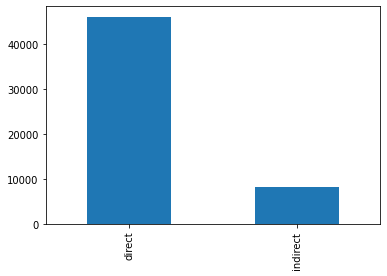

In [20]:
df.acces.value_counts().plot(kind="bar")

<AxesSubplot:xlabel='acces'>

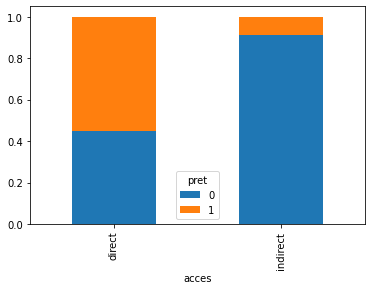

In [21]:
table_acces=pd.crosstab(df['acces'],df['pret'])
table_acces.div(table_acces.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

In [265]:
#df.drop(['Desc Localisation'], axis = 1, inplace = True)

## Numéro d'inventaire

A partir de la structure des numéros d'inventaire on génère une nouvelle variable à 2 modalités qui représente le type d'acquisition des exemplaires : acq courante ou don

In [50]:
def create_new_variable_acq(row):
    if '-DON' in row['Numéro Inventaire']:
        return "don"
    else:
        return "achat"

In [51]:
df["acq"] = df.apply (lambda row:create_new_variable_acq(row), axis=1)

<AxesSubplot:>

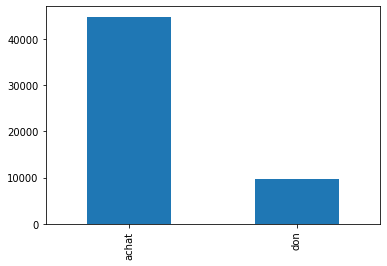

In [24]:
df.acq.value_counts().plot(kind="bar")

<AxesSubplot:xlabel='acq'>

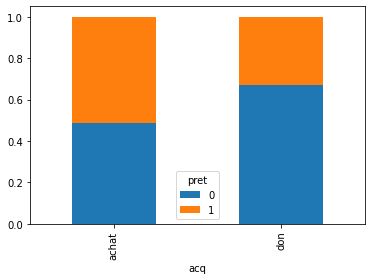

In [25]:
table_acces=pd.crosstab(df['acq'],df['pret'])
table_acces.div(table_acces.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

In [35]:
#df.drop(['Numéro Inventaire'], axis = 1, inplace = True)

## Cote

bla bla bla

In [52]:
df['Desc Cote Début'] = df['Desc Cote Début'].astype(str)[:2]

In [53]:
def reconstitute_dewey_indice(row):
    if (pd.notna(row['Desc Cote Début'])) & (len(str(row['Desc Cote Début']))) == 1:
        return row['Desc Cote Début'].zfill(2)
    if (pd.isna(row['Desc Cote Début'])) & (row['Desc Type Cote Principale'] == "Dewey"):
        return row['Desc Cote Principale'][:2] 
    if (pd.isna(row['Desc Cote Début'])) & (row['Desc Type Cote Principale'] == "NLM"):
        return row['Desc Cote Principale'][:2]
    if (pd.isna(row['Desc Cote Début'])) & ("Magasin" in row['Desc Type Cote Principale']):
        return "numinv"
    else:
        return row['Desc Cote Début'] 
df["indice"] = df.apply (lambda row:reconstitute_dewey_indice(row), axis=1)   

In [54]:
# On atribue un indice unique pour les docs en accès indirect
df['indice']=np.where(df['acces'] == 'indirect', 'numinv', df['indice'])

<AxesSubplot:>

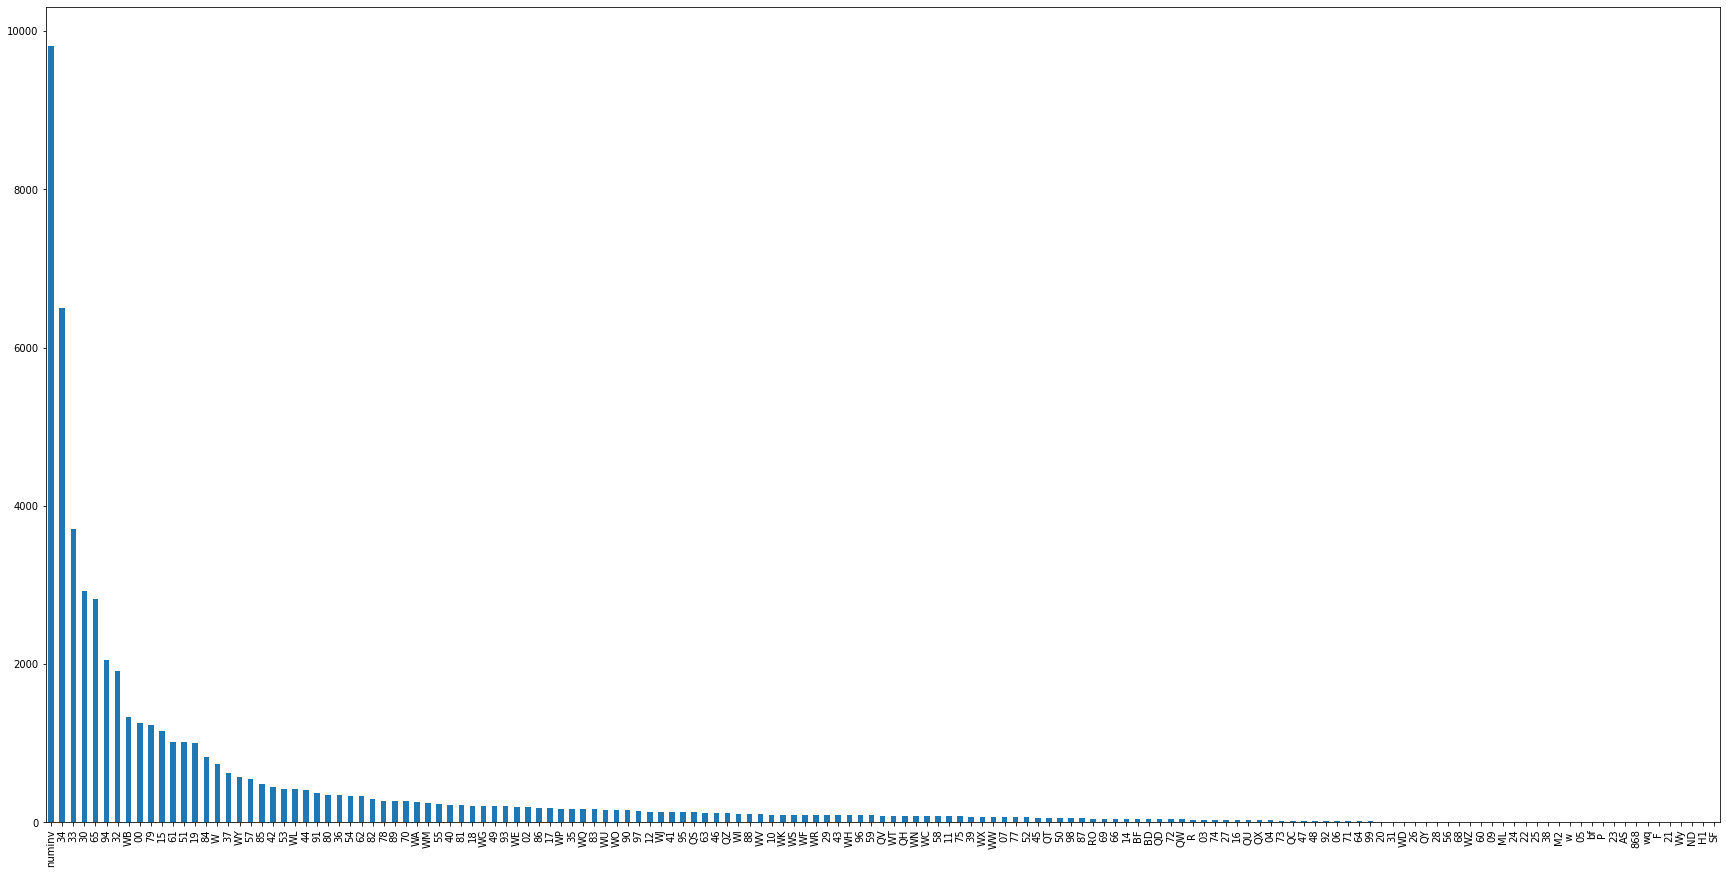

In [57]:
plt.figure(figsize=(30, 15))
df["indice"].value_counts().plot(kind="bar")

In [58]:
df.to_csv("temp.csv", sep=",", index=False, encoding="utf-8")

## [Unused] ppn et API multiwhere

In [312]:
df["ppn"] = df.PPN.str[3:]

In [205]:
def get_multiwhere(ppn):
    url = f"https://www.sudoc.fr/services/multiwhere/{ppn}&format=text/json"
    result = {}
    try:
        requests.get(url)  
        if requests.get(url).status_code == 200:
            result["ppn"] = str(ppn)
            response = requests.get(url).text
            libraries = json.loads(response)["sudoc"]["query"]["result"]["library"]
            if isinstance(libraries, list):
                result["multiwhere"] = len(libraries)
            else:
                result["multiwhere"] = 1
    except ValueError:
        pass
    return result
# vérif get_multiwhere("003901440")

In [206]:
def get_multiwhere_from_ppn_list(list_ppn):
    df_result = pd.DataFrame(get_multiwhere(i) for i in list_ppn)
    return df_result

In [207]:
list_ppn = df.drop_duplicates(subset=['ppn'], keep='last')["ppn"].to_list()[0:200]
n = 100
result = []
for i in range(0, len(list_ppn), n):
    print("PPN traités : de "+ str(i) + " à " + str(i+n))
    #sauvegarde intermédiaire en csv
    get_multiwhere_from_ppn_list(list_ppn[i:i+n]).to_csv("fichiers_intermediaires_multiwhere/multiwhere_"+str(i)+".csv",index = False,encoding='utf8')

PPN traités : de 0 à 10
PPN traités : de 10 à 20
PPN traités : de 20 à 30
PPN traités : de 30 à 40
PPN traités : de 40 à 50
PPN traités : de 50 à 60
PPN traités : de 60 à 70
PPN traités : de 70 à 80
PPN traités : de 80 à 90
PPN traités : de 90 à 100


# Dataset ready

In [59]:
df.drop(['Desc Cote Principale','Desc Localisation','PPN','Desc Type Cote Principale','Desc Cote Début','Numéro Inventaire','Année Création Exemplaire'], axis = 1, inplace = True)

In [60]:
# Renommage colonnes
df.rename(columns = {'Date Publication':'date_pub', 'ID Statut Exemplaire':'statut_ex', 'Bibliothèque Exemplaire': 'bib'}, inplace = True)

In [61]:
df.to_csv("tous_exemplaires_ready.csv", sep=",", index=False, encoding="utf-8")